# EJERCICIOS

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pandas as pd
import joblib
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,confusion_matrix, roc_auc_score
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from scipy.stats import reciprocal,randint
from sklearn.feature_extraction.text import TfidfVectorizer

## EJERCICIO 1

Vamos a trabajar con el siguiente conjunto de datos: https://www.datacamp.com/es/datalab/datasets/dataset-python-loans

| Variable      	| Explicación                                                                                                             |
|-------------------|-------------------------------------------------------------------------------------------------------------------------|
| credit_policy	    | 1 si el cliente cumple con los criterios de suscripción de crédito; 0 en caso contrario.                                |
| purpose	        | El propósito del préstamo.                                                                                              |
| int_rate	        | La tasa de interés del préstamo (a los prestatarios más riesgosos se les asignan tasas más altas).                      |
| installment	    | Las cuotas mensuales del prestamo                                                                                       |
| log_annual_inc    | El logaritmo natural del ingreso anual declarado por el prestatario.                                                    |
| dti	            | La relación deuda-ingreso del prestatario (monto de deuda dividido por ingresos anuales).                               |
| fico	            | El puntaje de crédito FICO del prestatario.                                                                             |
| days_with_cr_line	| El número de días que el prestatario ha tenido una línea de crédito.                                                    |
| revol_bal	        | El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta).                    |
| revol_util        | La tasa de utilización de la línea de crédito del prestatario (monto de crédito utilizado respecto al total disponible).|
| inq_last_6mths	| El número de consultas de los acreedores al prestatario en los últimos 6 meses.                                         |
| delinq_2yrs	    | El número de veces que el prestatario ha estado más de 30 días en mora en un pago en los últimos 2 años.                |
| pub_rec	        | El número de registros públicos despectivos del prestatario.                                                            |
| not_fully_paid    | 1 si el préstamo se pagó totalmente; 0 en caso contrario.                                                        |

El csv lo tienes disponible en Moodle

Este conjunto de datos consta de más de 9500 préstamos con información sobre los datos del préstamo y si el préstamo fue pagado en su totalidad o no. Estos datos fueron extraídos de LendingClub.com
Crea un clasificador para predecir si un prestamo va a ser pagado o no.

FICO: es un número que se utiliza para predecir las probabilidades de que usted pague un préstamo a tiempo.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [46]:
loan_data = pd.read_csv("../datos/loan_data.csv")
loan_data_copy = loan_data.copy()

#### EXPLORAR LOS DATOS

Entre otras cosas: estadísticas, matriz de correlaciones y borrar columnas innecesarias.

In [47]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [48]:
loan_data.info()
# ['int.rate','installment','log.annual.inc','dti','days.with.cr.line','revol.bal','revol.util']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [49]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [50]:
loan_data["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

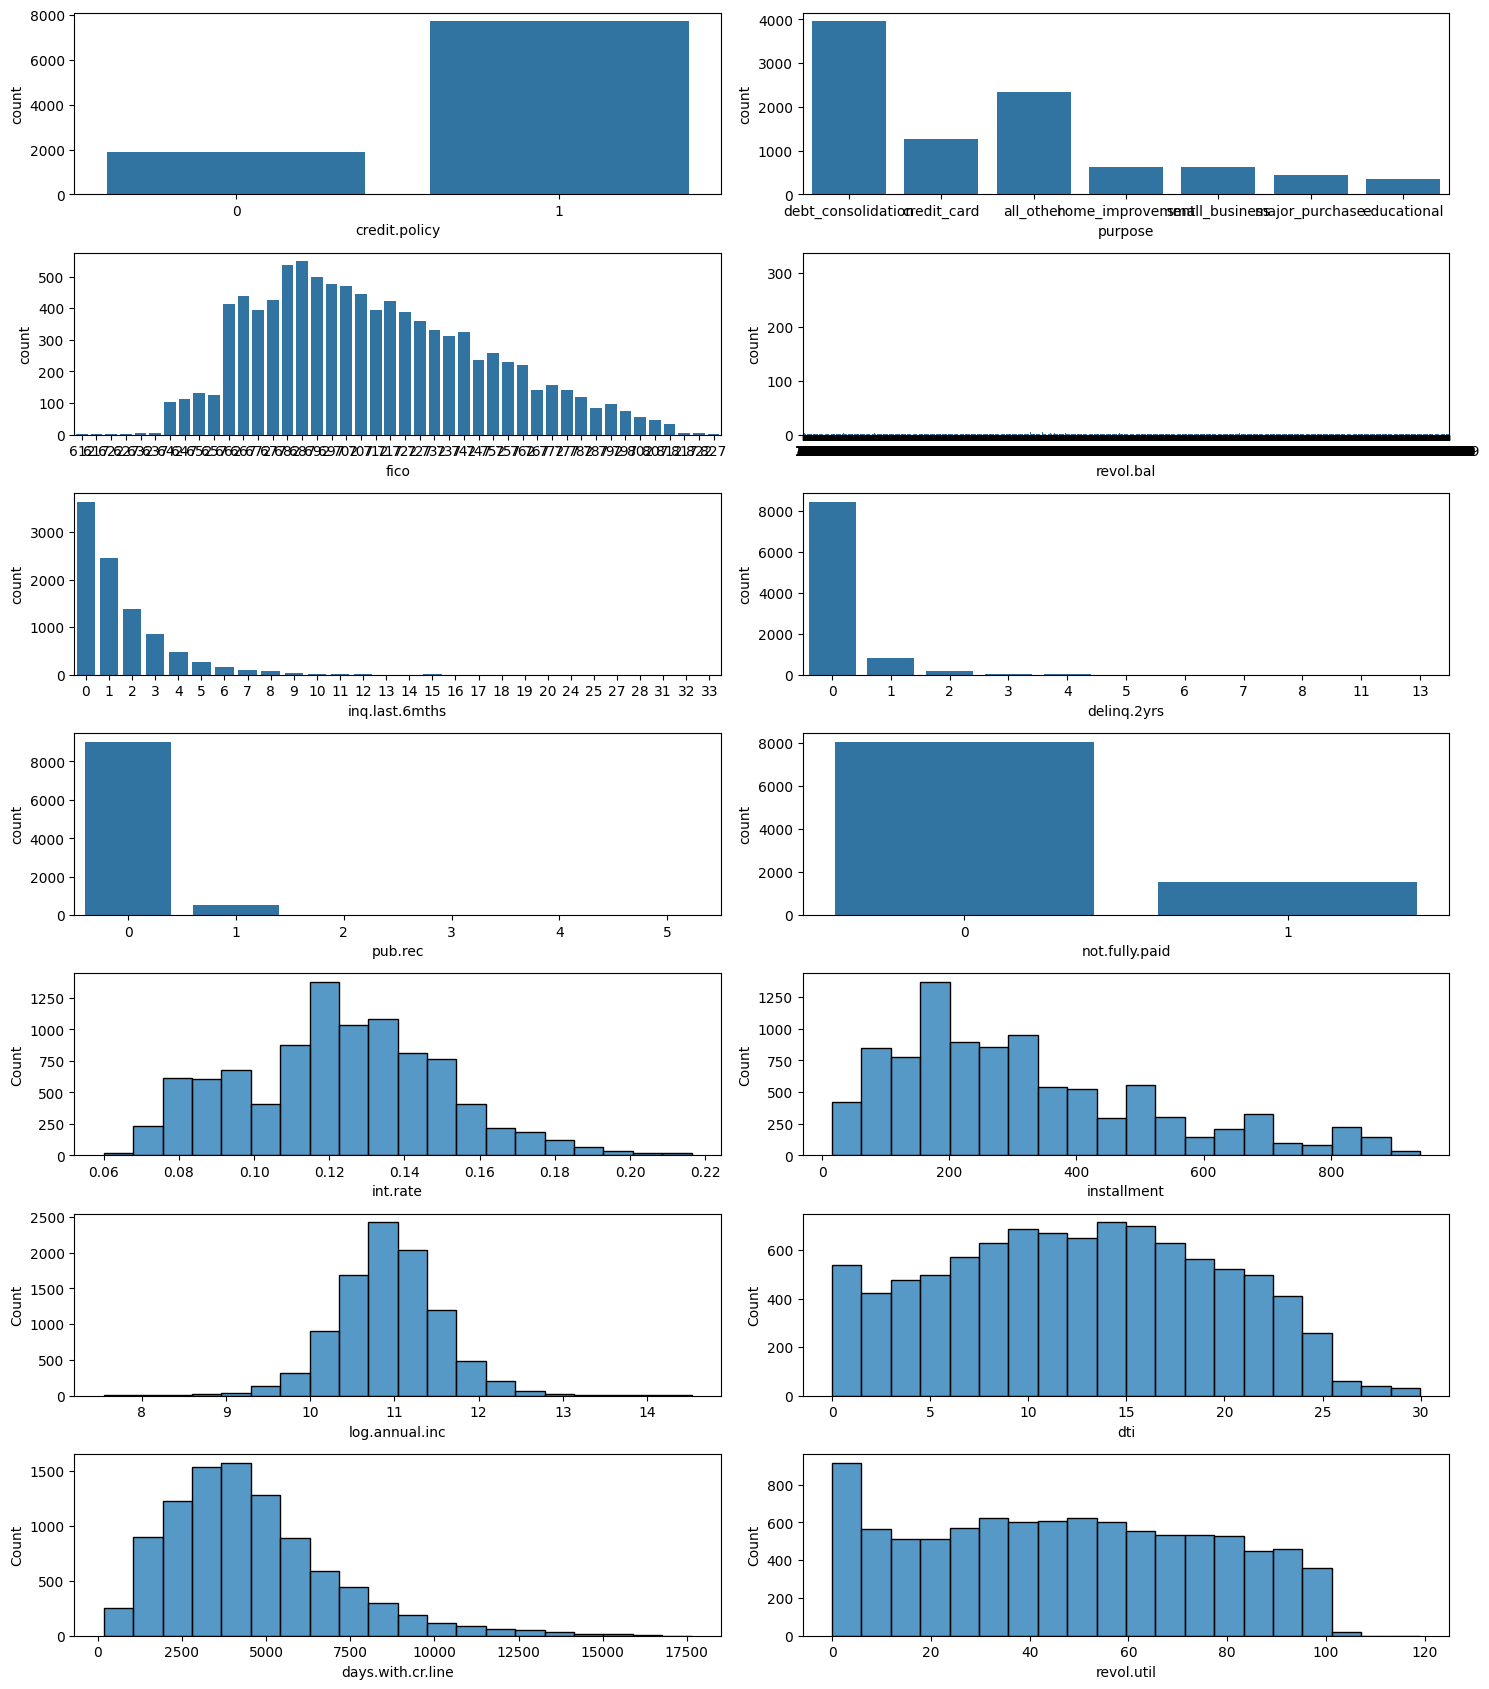

In [51]:
fig,ax = plt.subplots(7,2, figsize=(15,17))
ax = ax.flatten()   #para poder hacer ax[i] en vez de ax[i,j] porque el grafico se divide en más de una columna (4,2)    
cols_disc = loan_data.select_dtypes(include=['float64'])
cols_cont = loan_data.select_dtypes(include=['int64','object'])
i = 0
for col in cols_cont.columns:
    sns.countplot(data=loan_data, x=col, ax=ax[i], legend=None)
    #ax[i].set_title(col)
    i+=1
for col in cols_disc.columns:
    sns.histplot(data=loan_data, x=col, ax=ax[i], bins=20, legend=None)
    #ax[i].set_title(col)
    i+=1

plt.tight_layout()
plt.show()

<Axes: xlabel='interes_cat', ylabel='count'>

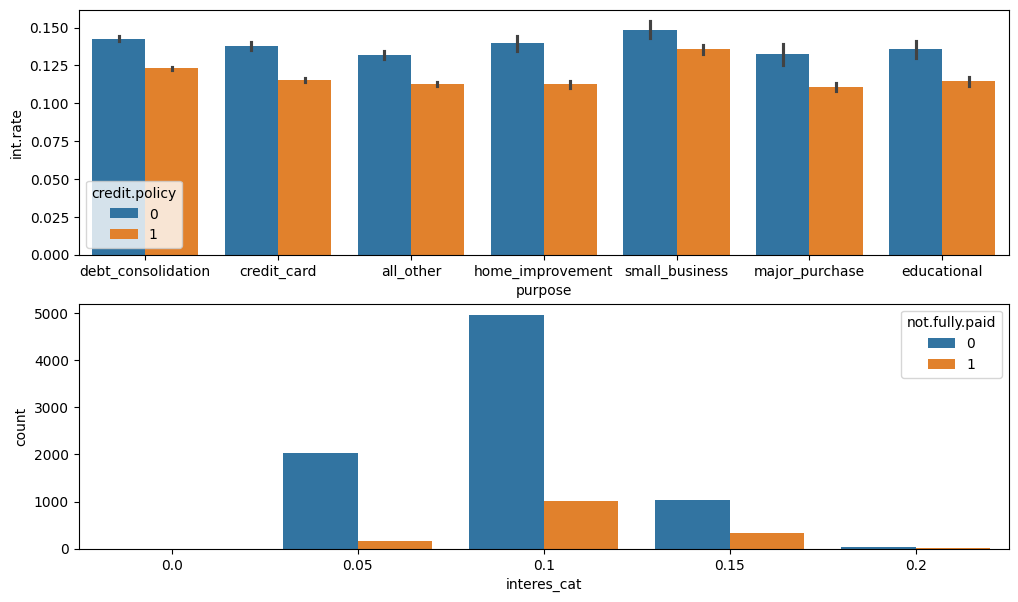

In [52]:
loan_data_copy['interes_cat'] = pd.cut(
    loan_data_copy['int.rate'],
    bins = [-1,0.05,0.1,0.15,0.2,np.inf],
    labels=[0,0.05,0.1,0.15,0.2])

fig, ax=plt.subplots(2,1,figsize=(12,7))
ax=ax.flatten()
sns.barplot(loan_data, x='purpose', y='int.rate',hue='credit.policy', ax=ax[0])
sns.countplot(data=loan_data_copy, x='interes_cat', hue='not.fully.paid', ax=ax[1])

In [53]:
loan_data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [54]:
# media cuotas mensuales por purpose
media_cuotas_razones = loan_data[['installment','purpose']].groupby('purpose').mean()
media_cuotas_razones=media_cuotas_razones.sort_values(by='purpose',ascending=False)
media_cuotas_razones

,installment
purpose,
small_business,433.826607
major_purchase,243.483913
home_improvement,337.071590
educational,217.547201
debt_consolidation,358.984390
credit_card,319.500713
all_other,244.937542


In [55]:
# media de interes por purpose
media_interes_razones = loan_data[['int.rate','purpose']].groupby('purpose').mean()
media_interes_razones=media_interes_razones.sort_values(by='purpose',ascending=False)
media_interes_razones

,int.rate
purpose,
small_business,0.138087
major_purchase,0.114171
home_improvement,0.117507
educational,0.119907
debt_consolidation,0.126595
credit_card,0.119738
all_other,0.116771


In [56]:
# media de retrasos segun si han pagado
media_retraso_pagado = loan_data[['delinq.2yrs','not.fully.paid']].groupby('not.fully.paid').mean()
media_retraso_pagado = media_retraso_pagado.sort_values(by='not.fully.paid',ascending=False)
media_retraso_pagado
# no me dice gran cosa

,delinq.2yrs
not.fully.paid,
1,0.174821
0,0.161591


In [57]:
# media de interes segun si han pagado
media_retraso_pagado = loan_data[['delinq.2yrs','not.fully.paid']].groupby('not.fully.paid').mean()
media_retraso_pagado = media_retraso_pagado.sort_values(by='not.fully.paid',ascending=False)
media_retraso_pagado

,delinq.2yrs
not.fully.paid,
1,0.174821
0,0.161591


In [58]:
corr_matrix = loan_data.corr(numeric_only=True)
corr_matrix["not.fully.paid"].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

In [59]:
corr_matrix["credit.policy"].sort_values(ascending=False)

credit.policy        1.000000
fico                 0.348319
days.with.cr.line    0.099026
installment          0.058770
log.annual.inc       0.034906
pub.rec             -0.054243
delinq.2yrs         -0.076318
dti                 -0.090901
revol.util          -0.104095
not.fully.paid      -0.158119
revol.bal           -0.187518
int.rate            -0.294089
inq.last.6mths      -0.535511
Name: credit.policy, dtype: float64

In [60]:
corr_matrix.style.background_gradient()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


Conclusiones:
  - No veo nada que tenga mucha relacion con que hayan pagado(not.fully.paid). Las que mas tienen son si son aptos, el interes, visitas al acreedor y fico pero ninguno llega a 0.16
  - El fico tiene que ver para que uno sea apto
Estoy considerando borrar:
  - delinq.2yrs  (retrasos de 1 mes en 2 anios)
  - pub.rec (registros publicos despectivos)
  - log.annual.inc
  - days.with.cr.line
  - dti


In [61]:
data_cribado = loan_data.drop(columns=['delinq.2yrs','pub.rec','log.annual.inc','days.with.cr.line','dti'])

#### DIVIDIR LOS DATOS

In [62]:

y = data_cribado['not.fully.paid']
x = data_cribado.drop('not.fully.paid', axis=1)

train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(x,y,
                            test_size=0.15, random_state=42,
                            stratify=y)

#### PREPARAR LOS DATOS

In [63]:
train_set_x.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'fico',
       'revol.bal', 'revol.util', 'inq.last.6mths'],
      dtype='object')

Cosas que hacer:
- Rellenos:
  - Moda: purpose
  - Media: 'credit.policy', 'int.rate', 'installment', 'fico',
       'revol.bal', 'revol.util', 'inq.last.6mths'
       
- Transformaciones:
  - purpose: OneHotEncoder
  

In [64]:
# imputers
imputer_moda = SimpleImputer(strategy="most_frequent")
imputer_media = SimpleImputer(strategy="mean")

# pipelines
num_pipeline = make_pipeline(
    imputer_media,
    StandardScaler()
)
purpose_pipeline = make_pipeline(
    imputer_moda,
    OneHotEncoder(handle_unknown="ignore")
)

#not.fully.paid, credit.policy, purpose
# megapipeline
pipeline = ColumnTransformer([
     ('num', num_pipeline, x.select_dtypes(include=[np.number]).columns.tolist()), 
     ('purpose', purpose_pipeline, ['purpose'])
 ]
#  ,verbose_feature_names_out=False
 )

train_set_copy = train_set_x.copy()
#meter los datos a la pipeline
train_set_prep = pipeline.fit_transform(train_set_copy)

#pasar los datos a dataframe
pipeline_column = pipeline.get_feature_names_out()   #nombres columnas
df_train_set = pd.DataFrame(train_set_prep, columns=pipeline_column)
df_train_set.head()

,num__credit.policy,num__int.rate,num__installment,num__fico,num__revol.bal,num__revol.util,num__inq.last.6mths,purpose__purpose_all_other,purpose__purpose_credit_card,purpose__purpose_debt_consolidation,purpose__purpose_educational,purpose__purpose_home_improvement,purpose__purpose_major_purchase,purpose__purpose_small_business
0,0.490538,0.224933,0.486270,-0.102275,-0.139473,0.718282,-0.725694,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.490538,-0.377256,1.392810,0.821247,0.084262,-1.020091,-0.725694,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-2.038577,0.449351,1.241575,0.161588,-0.369462,0.928264,1.594761,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.490538,-0.422139,0.039766,0.425452,-0.377020,-1.261054,0.202488,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.038577,0.804679,-0.880984,-0.102275,-0.146053,1.475594,2.522943,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos:
- Regresión logisitca
- SGDClassifier
- K vecinos mas cercanos
- Random Forest

 y evalua los resultados en el conjunto de entrenamiento con las siguientes métricas: exactitud, prescisión, sensibilidad, f1, curva de roc y área bajo la curva de roc

####### LogisticRegression #######
            Exactitud: 0.8394546124554723
            Precision: 0.46774193548387094
            Sensibilidad: 0.022256331542594012
            f1: 0.04249084249084249
area bajo la curva de rod:  0.6652116956459961


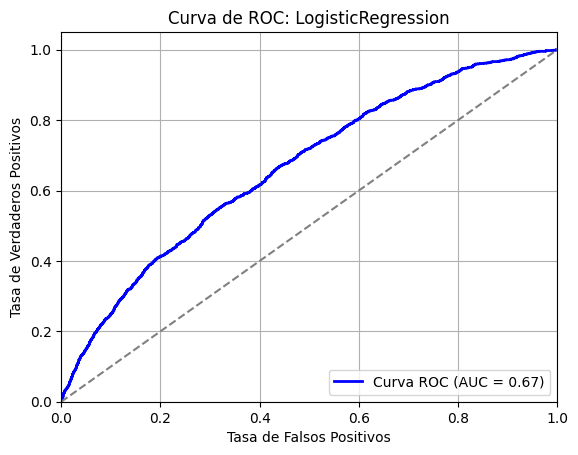

####### SGDClassifier #######
            Exactitud: 0.8400687876182287
            Precision: 0.5161290322580645
            Sensibilidad: 0.012279355333844973
            f1: 0.0239880059970015
area bajo la curva de rod:  0.5526473095026507


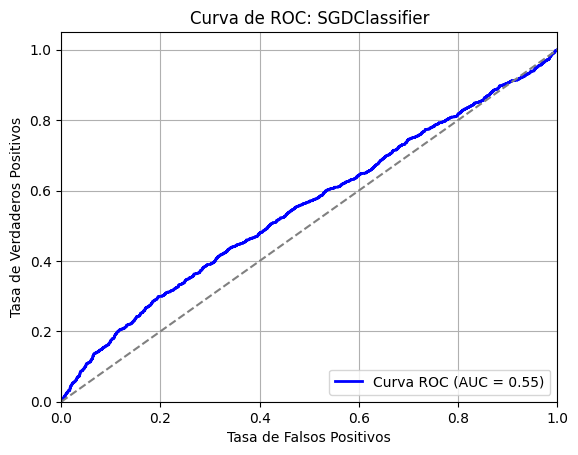

####### KNeighborsClassifier #######
            Exactitud: 0.8013757523645744
            Precision: 0.23024054982817868
            Sensibilidad: 0.10283960092095165
            f1: 0.14217506631299734
area bajo la curva de rod:  0.5553211849182832


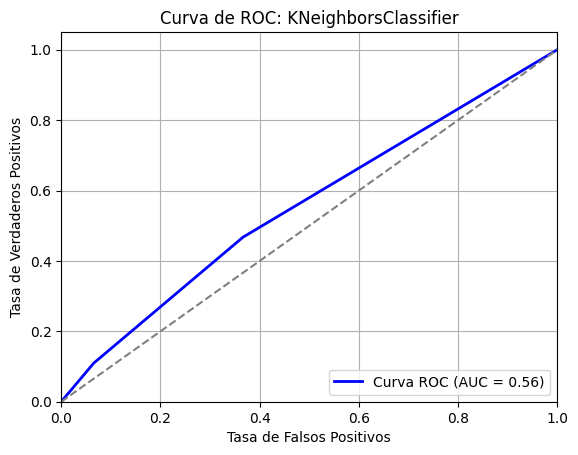

####### RandomForestClassifier #######
            Exactitud: 0.8277852843631004
            Precision: 0.3088803088803089
            Sensibilidad: 0.06139677666922486
            f1: 0.10243277848911651
area bajo la curva de rod:  0.6068217942395404


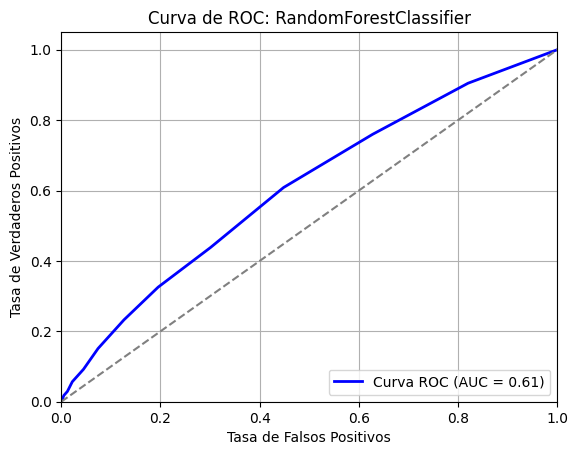

In [65]:
modelos = {
    'LogisticRegression':LogisticRegression(random_state=42, max_iter=1731),
    'SGDClassifier':SGDClassifier(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=3),
    'RandomForestClassifier':RandomForestClassifier(random_state=42,n_estimators=17)
}

for key in modelos.keys():
      #crear entrenar modelo
      modelo = modelos[key]
      pipe = make_pipeline(pipeline,modelo)

      #evaluacion cruzada 
      predic_y_train = cross_val_predict(pipe, train_set_x, train_set_y, cv=4)

      exactutid = accuracy_score(train_set_y, predic_y_train)
      precision=precision_score(train_set_y, predic_y_train)  
      sensibilidad=recall_score(train_set_y, predic_y_train)
      f1=f1_score(train_set_y, predic_y_train)

      print('''####### {} #######
            Exactitud: {}
            Precision: {}
            Sensibilidad: {}
            f1: {}'''.format(key,exactutid,precision,sensibilidad,f1))
      
      
      #curva de roc
      soporta_roc = False
      if hasattr(modelo, 'decision_function'):
            predic_y_train = cross_val_predict(pipe, train_set_x, train_set_y, cv=3, method='decision_function')
            soporta_roc = True
      if hasattr(modelo, 'predict_proba'):
            predic_y_train = cross_val_predict(pipe, train_set_x, train_set_y, cv=3, method='predict_proba')[:, 1]
            soporta_roc = True
            
      if soporta_roc:
            fpr, tpr, _ = roc_curve(train_set_y, predic_y_train)
            roc_area = roc_auc_score(train_set_y, predic_y_train)

            print('area bajo la curva de rod: ',roc_area)
            plt.figure()
            plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_area:.2f})")
            plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel("Tasa de Falsos Positivos")
            plt.ylabel("Tasa de Verdaderos Positivos")
            plt.title("Curva de ROC: "+key)
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.show()


### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [69]:
# full_pipeline = Pipeline([
#     ('preprocessing', pipeline),
#     ('logistic_regression', LogisticRegression(random_state=42, max_iter=1731))
# ])
full_pipeline = make_pipeline(pipeline,LogisticRegression(random_state=42, max_iter=1731))
param_dist = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  
    'logisticregression__solver': ['lbfgs', 'saga']  # algoritmos de optimizacion
}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_dist, cv=3, scoring='f1', 
                                verbose=1, n_jobs=1, n_iter=13)
rnd_search.fit(train_set_x, train_set_y)
rnd_search.best_params_


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 10 is smaller than n_iter=13. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'logisticregression__solver': 'saga', 'logisticregression__C': 100}

#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el conjunto de pruebas con diferentes métricas


        Exactitud: 0.8399443284620738
        Precision: 0.5
        Sensibilidad: 0.0391304347826087
        f1: 0.07258064516129033
		Area bajo curva de roc:  0.6629912467130147


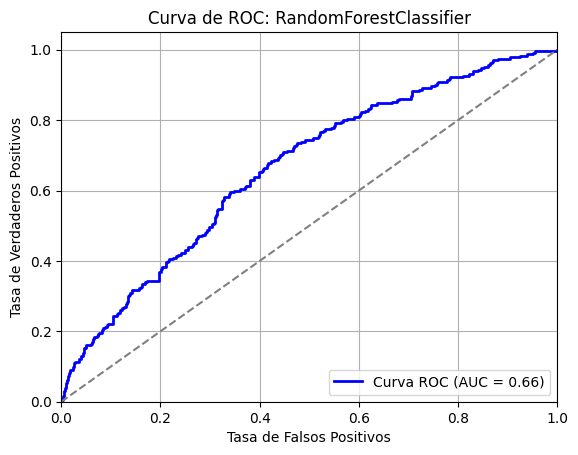

In [76]:
final_model = rnd_search.best_estimator_
predic_y_test = final_model.predict(test_set_x)

exactutid = accuracy_score(test_set_y, predic_y_test)
precision=precision_score(test_set_y, predic_y_test)  
sensibilidad=recall_score(test_set_y, predic_y_test)
f1=f1_score(test_set_y, predic_y_test)
print('''
        Exactitud: {}
        Precision: {}
        Sensibilidad: {}
        f1: {}'''.format(exactutid,precision,sensibilidad,f1))

# curva de roc
soporta_roc = False
if hasattr(modelo, 'predict_proba'):
    predic_y_train = cross_val_predict(pipe, train_set_x, train_set_y, cv=3, method='predict_proba')[:, 1]
    soporta_roc = True

if soporta_roc:
    y_test_proba = cross_val_predict(final_model, test_set_x, test_set_y, cv=3, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(test_set_y, y_test_proba)
    roc_auc = auc(fpr, tpr)
    # área bajo la curva de roc
    test_roc_area = roc_auc_score(test_set_y, y_test_proba)
    print('\t\tArea bajo curva de roc: ',test_roc_area)
    plt.figure()
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title("Curva de ROC: "+key)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

### PRESENTACIÓN DE LA SOLUCIÓN

Guarda mejor modelo (pipeline de preparación de los datos + modelo) y  haz un script de python que te pida los datos necesarios ('int_rate', 'installment', 'fico',  'revol_bal', 'revol_util', 'inq_last_6mths', 'pub_rec' y 'purpose') y prediga la solución.

In [78]:
joblib.dump(final_model, "./2_8_E1_Elena.pkl")

['./2_8_E1_Elena.pkl']

## EJERCICIO 2

Vamos a trabajar conun conjunto de datos digits.

Crea un clasificador que nos diga de que número se trata.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [ ]:
# Cargar el conjunto de datos
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

#### EXPLORAR LOS DATOS

In [ ]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
print(len(X_digits[0]))
X_digits[0]

64


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
y_digits

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
print(type(X_digits),' <--X  type  y--> ',type(y_digits))

<class 'numpy.ndarray'>  <--X  type  y-->  <class 'numpy.ndarray'>


In [ ]:
nums,count = np.unique_counts(y_digits)
for i in range(len(nums)):
    print(nums[i],' --> ',count[i])

0  -->  178
1  -->  182
2  -->  177
3  -->  183
4  -->  181
5  -->  182
6  -->  181
7  -->  179
8  -->  174
9  -->  180


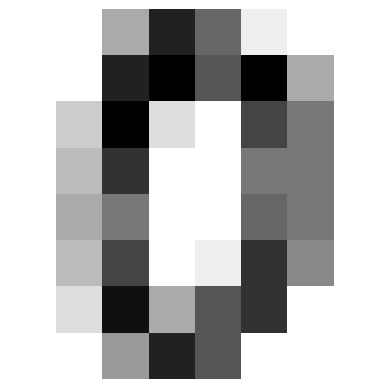

In [ ]:
dig = X_digits[0]
img = dig.reshape(8, 8)
plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

#### DIVIDIR LOS DATOS

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_digits,y_digits, test_size=0.15, random_state=42)

#### PREPARAR LOS DATOS

In [ ]:
pipeline_dig = ColumnTransformer([
    ("scaler", StandardScaler(), slice(0, x_train.shape[1])) 
])

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos, evalua los resultados en el conjunto de entrenamiento (exactitud) y calcula la matriz de confusión:
- Regresión logistica
- Maquinas de vectores de sorpote
- Random forest

Regresión logistica Exactitud: 0.9567779960707269


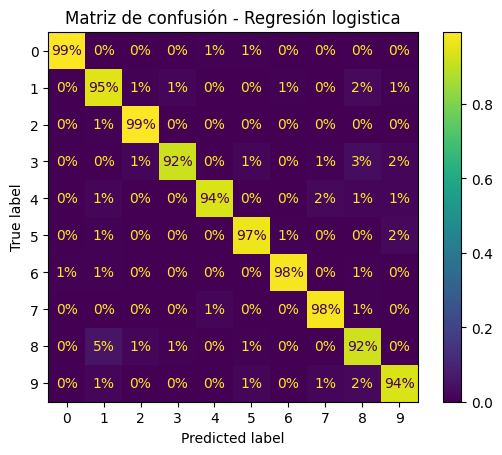

SVC Exactitud: 0.9738048461034708


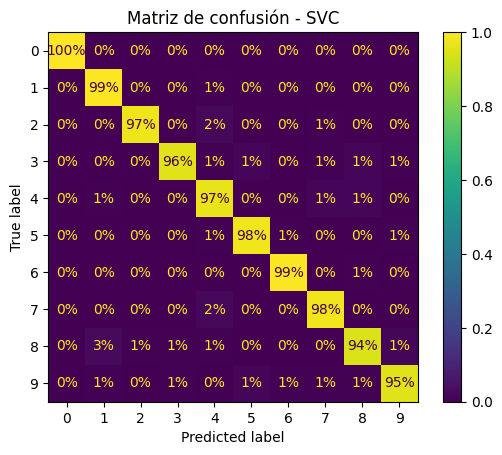

Random forest Exactitud: 0.971185330713818


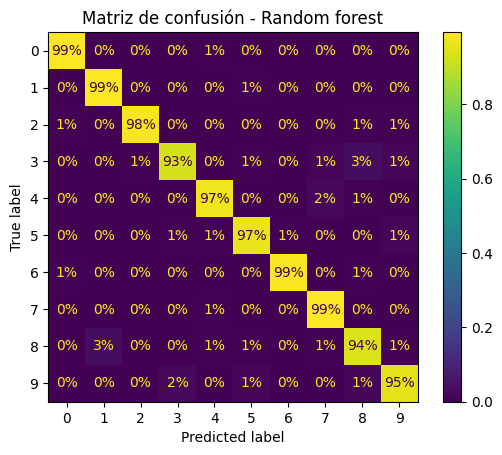

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

modelos = {
    'Regresión logistica':LogisticRegression(random_state=42, max_iter=1000),
    'SVC':SVC(random_state=42),
    'Random forest':RandomForestClassifier(random_state=42)
}

for key, model in modelos.items():
    
    pipe = make_pipeline(pipeline_dig, model)
    y_train_pred = cross_val_predict(pipe, x_train, y_train, cv=3)
    
    # exactitud 
    exactitud = accuracy_score(y_train, y_train_pred)
    print('{} Exactitud: {}'.format(key,exactitud))
    
    # Matriz de confusión
    ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%')
    plt.title('Matriz de confusión - {}'.format(key))
    plt.show()

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [ ]:
param_dist = {
    "svc__C": np.logspace(-3, 3, 10),  # Valores entre 0.001 y 1000 en escala logarítmica
    "svc__gamma": np.logspace(-3, 3, 10),  # Similar a C
    "svc__kernel": ["linear", "rbf", "poly", "sigmoid"],  # Tipos de kernel
    "svc__degree": [2, 3, 4]  # Para kernels polinomiales
}

svc_pipeline = make_pipeline(pipeline_dig,SVC())

random_search = RandomizedSearchCV(
    estimator=svc_pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones a probar
    scoring="accuracy",  
    cv=5,  # Validación cruzada 
    random_state=42,
    verbose=1,  # Mostrar progreso
    n_jobs=-1  # Usar todos los núcleos disponibles
)

random_search.fit(x_train, y_train)
print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros: {'svc__kernel': 'poly', 'svc__gamma': np.float64(0.1), 'svc__degree': 2, 'svc__C': np.float64(215.44346900318823)}


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

In [ ]:
final_model = random_search.best_estimator_
y_pred = final_model.predict(x_test)
exactutud_ev = accuracy_score(y_test, y_pred)
print('Exactitud: ',exactutud_ev)

Exactitud:  0.9851851851851852


### PRESENTACIÓN DE LA SOLUCIÓN

Simplemente guarda el modelo

In [ ]:
joblib.dump(final_model, "./2_8_E2_Elena.pkl")

## EJERCICIO 3

Vamos a trabajar con un conjunto de datos donde cada instancia (en este caso, cada película) pueda tener múltiples etiquetas (géneros en este caso).

Tienes los datos en el fichero tmdb_5000_movies.csv

Crea un clasificador que te diga los generos que le corresponden a cada película.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [ ]:
# Cargar los datos
data = pd.read_csv("../datos/tmdb_5000_movies.csv")

# Preprocesamiento de datos
# Transformar géneros en listas de palabras separadas
data["genres"] = data["genres"].apply(lambda x: [genre["name"] for genre in eval(x)])

# Dividir los datos en características (X) y etiquetas (y)
X = data["overview"]
y = data["genres"]

#### EXPLORAR LOS DATOS

In [ ]:
print(type(X),' <--X  type  y--> ',type(y))

<class 'pandas.core.series.Series'>  <--X  type  y-->  <class 'pandas.core.series.Series'>


In [ ]:
print(X.values,'\n\n len:',len(X.values))

['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'
 'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'
 'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.'
 ...
 '"Signed, Sealed, Delivered" introduces a dedicated quartet of civil servants in the Dead Letter Office of the U.S. Postal System who transform themselves into an elite team of lost-mail detectives. Their determination to deliver the seemingly undeliverable takes them out of the post office into an unpredictable world where letters and packages from the past save lives, solve crimes, reun

In [ ]:
y.values

array([list(['Action', 'Adventure', 'Fantasy', 'Science Fiction']),
       list(['Adventure', 'Fantasy', 'Action']),
       list(['Action', 'Adventure', 'Crime']), ...,
       list(['Comedy', 'Drama', 'Romance', 'TV Movie']), list([]),
       list(['Documentary'])], dtype=object)

In [ ]:
generos = {}
for lista in y:
    for gen in lista:
        if gen not in generos.keys():
            generos[gen] = 1
        else:
            generos[gen] = generos[gen]+1
print('Cantidad de generos:',len(generos))
generos

Cantidad de generos: 20


{'Action': 1154,
 'Adventure': 790,
 'Fantasy': 424,
 'Science Fiction': 535,
 'Crime': 696,
 'Drama': 2297,
 'Thriller': 1274,
 'Animation': 234,
 'Family': 513,
 'Western': 82,
 'Comedy': 1722,
 'Romance': 894,
 'Horror': 519,
 'Mystery': 348,
 'History': 197,
 'War': 144,
 'Music': 185,
 'Documentary': 110,
 'Foreign': 34,
 'TV Movie': 8}

In [ ]:
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4803 entries, 0 to 4802
Series name: overview
Non-Null Count  Dtype 
--------------  ----- 
4800 non-null   object
dtypes: object(1)
memory usage: 37.6+ KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4803 entries, 0 to 4802
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
4803 non-null   object
dtypes: object(1)
memory usage: 37.6+ KB


#### DIVIDIR LOS DATOS

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)

#### PREPARAR LOS DATOS

Tienes aquí las transformaciones que hay que hacer a los datos pero busca en internet que estamos haciendo exactamente y explicalo (igual hay que hacer algo con los datos que faltan)

TfidfVectorizer:
 - Convierte una colección de documentos sin procesar en una matriz de características TF-IDF. 
 - TF-IDF el el resultado de una fórmula que pretende definir la importancia de una palabra clave o frase
 
MultiLabelBinarizer:
 - El procesamiento de listas de conjuntos y tuplas es complicado. MultiLabelBinarizer convierte listas de etiquetas a una matriz binaria

In [ ]:
# borramos los nulos de x
x_train = x_train.dropna()
x_test = x_test.dropna()
# nos quedamos con las y que corresponden a las x no nulas
y_train = y_train.loc[x_train.index]
y_test = y_test.loc[x_test.index]

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

mlb = MultiLabelBinarizer()
y_train_transformed = mlb.fit_transform(y_train)
y_test_transformed = mlb.transform(y_test)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea un modelo Random Forest y evalúa el modelo en el conjunto de entrenamiento (accuracy), no hace falta usar validación cruzada.

In [ ]:
modelo= RandomForestClassifier()
modelo.fit(x_train_tfidf, y_train_transformed)

# Evaluar 
y_predict_train = modelo.predict(x_train_tfidf)
acc_train = accuracy_score(y_train_transformed, y_predict_train)
print('Exactitud: ',acc_train)

Exactitud:  0.9997549019607843


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el modelo en el conjuno de prueba y muestra las primeras 25 predicciones y sus correspondientes valores reales (con texto, para lo cual tendras que aplicar mlb.inverse_transform a las predicciones).

¿Qué puedes deducir del resultado?

In [ ]:
y_predict_test = modelo.predict(x_test_tfidf)
acc_test = accuracy_score(y_test_transformed, y_predict_test)
print('Exactitud: ',acc_test)

Exactitud:  0.0875


In [ ]:
pred_real = mlb.inverse_transform(y_test_transformed)
pred_test = mlb.inverse_transform(y_predict_test)
for i in range(25):
    print('Real: {}\nPrediccion: {}\n'.format(pred_real[i],pred_test[i]))
print('len de predicciones:',len(pred_test))

Real: ('Action', 'Adventure', 'Comedy', 'Thriller')
Prediccion: ()

Real: ('Action', 'Crime', 'Horror', 'Science Fiction', 'Thriller')
Prediccion: ()

Real: ('Drama', 'Mystery', 'Thriller')
Prediccion: ('Drama',)

Real: ('Drama', 'Romance')
Prediccion: ('Drama',)

Real: ('Adventure', 'Family', 'Fantasy')
Prediccion: ()

Real: ('Action', 'Adventure', 'Science Fiction')
Prediccion: ()

Real: ('Drama', 'Thriller')
Prediccion: ('Drama',)

Real: ('Comedy', 'Romance')
Prediccion: ()

Real: ('Comedy', 'Drama', 'Romance')
Prediccion: ('Comedy',)

Real: ('Drama', 'Science Fiction', 'Thriller')
Prediccion: ()

Real: ('Action', 'Drama', 'Thriller')
Prediccion: ('Thriller',)

Real: ('Drama', 'Romance')
Prediccion: ('Drama',)

Real: ('Comedy', 'Drama', 'Romance')
Prediccion: ('Comedy', 'Drama')

Real: ('Crime', 'Drama')
Prediccion: ('Drama',)

Real: ('Action', 'Comedy')
Prediccion: ()

Real: ('Action', 'Fantasy', 'Horror', 'Mystery')
Prediccion: ()

Real: ('Drama', 'Romance', 'Science Fiction', 'Th

In [ ]:
generos.clear()
for lista in pred_test:
    for gen in lista:
        if gen not in generos.keys():
            generos[gen] = 1
        else:
            generos[gen] = generos[gen]+1
generos

{'Drama': 372,
 'Comedy': 104,
 'Thriller': 5,
 'Romance': 8,
 'Action': 1,
 'Science Fiction': 3}

Muchas veces no predice nada y lo que predice es Drama o puede que Comedy. 
Es posible que sea porque en los datos de entrenamiento no hay suficientes casos del resto de generos ni 
estan balanceados. De drama hay 2300, de crimen 700 y de TV Movie no llega a 10 por ejemplo.